In [ ]:
The Battle of the Neighborhoods - Week 2-4
Part 4 Download and Explore Farmers Market dataset

In [7]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y
import seaborn as sns

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.18.1-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00  24.51 MB/s
geopy-1.18.1-p 100% |################################| Time: 0:00:00  35.73 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following packages will be UPDATED:

    seaborn: 0.8.0-py35h15a2772_0 --> 0.9.0-py35_0 anaconda

seaborn-0.9.0- 100% |################################| Time: 0:00:00  49.91 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py

In [1]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_268aa9cdab704074ad982b91f8ed4f1a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='zvUG8_oB2yImhcPYP_bZglylgn9LZ6ojtGTM6In_eS23',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_268aa9cdab704074ad982b91f8ed4f1a.get_object(Bucket='couseracapstone-donotdelete-pr-hsjoqugnmivqhr',Key='DOHMH_Farmers_Markets_and_Food_Boxes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

NYC_FM = pd.read_csv(body)
NYC_FM.head()

,FacilityName,Service_Category,Service_Type,Address,Address2,Borough,ZipCode,Latitude,Longitude,StartDate,EndDate
0,1 Centre Street,Farmers Markets and Food Boxes,Food Boxes,1 Centre Street,"South Building, 9th Floor",Manhattan,11101,40.713028,-74.003753,NaN,NaN
1,125th Street Farmers Market,Farmers Markets and Food Boxes,Farmers Markets,125th St & Adam Clayton Powell Jr Blvd,NaN,Manhattan,10027,40.808981,-73.948327,6/13/17,11/21/17
2,170 Farm Stand,Farmers Markets and Food Boxes,Farmers Markets,170th St & Townsend Ave,NaN,Bronx,10452,40.840095,-73.916827,7/5/17,11/22/17
3,175th Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,175th St bet Wadsworth Ave & Broadway,NaN,Manhattan,10033,40.845956,-73.937813,6/29/17,11/30/17
4,57th Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,57th St & 9th Ave,NaN,Manhattan,10019,40.767925,-73.985716,5/17/17,12/23/17


In [2]:
NYC_FM.columns

Index(['FacilityName', 'Service_Category', 'Service_Type', 'Address',
       'Address2', 'Borough', 'ZipCode', 'Latitude', 'Longitude', 'StartDate',
       'EndDate'],
      dtype='object')

In [4]:
print(NYC_FM.Service_Type.unique())

['Food Boxes' 'Farmers Markets']


In [5]:
NYC_FM['Service_Type'].value_counts().to_frame()

,Service_Type
Farmers Markets,144
Food Boxes,17


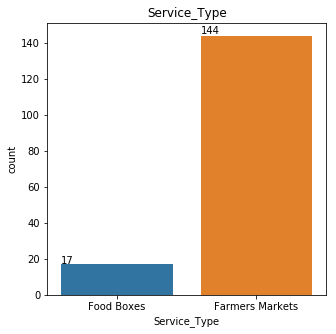

In [8]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Service_Type',data=NYC_FM)
ax.set_title("Service_Type")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    
plt.show();

In [9]:
# FM_NYC_filtered - Dataset with only Farmers Market
NYC_FM_filtered = NYC_FM[NYC_FM['Service_Type'] == 'Farmers Markets'].copy()
NYC_FM_filtered ['Borough'] = NYC_FM_filtered['Borough'].map(lambda x: x.strip())
print(NYC_FM_filtered.shape)
NYC_FM_filtered.head()

(144, 11)


,FacilityName,Service_Category,Service_Type,Address,Address2,Borough,ZipCode,Latitude,Longitude,StartDate,EndDate
1,125th Street Farmers Market,Farmers Markets and Food Boxes,Farmers Markets,125th St & Adam Clayton Powell Jr Blvd,NaN,Manhattan,10027,40.808981,-73.948327,6/13/17,11/21/17
2,170 Farm Stand,Farmers Markets and Food Boxes,Farmers Markets,170th St & Townsend Ave,NaN,Bronx,10452,40.840095,-73.916827,7/5/17,11/22/17
3,175th Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,175th St bet Wadsworth Ave & Broadway,NaN,Manhattan,10033,40.845956,-73.937813,6/29/17,11/30/17
4,57th Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,57th St & 9th Ave,NaN,Manhattan,10019,40.767925,-73.985716,5/17/17,12/23/17
5,79th Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,Columbus Ave bet 78th & 81st Sts,NaN,Manhattan,10024,40.783250,-73.974541,NaN,NaN


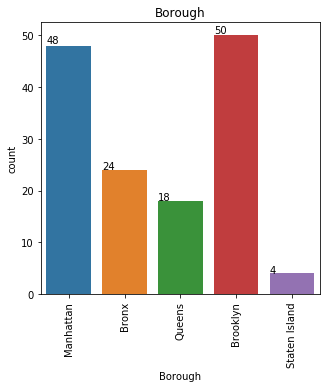

In [10]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Borough',data=NYC_FM_filtered)
ax.set_title("Borough")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

In [ ]:
It is clear that Manhattan and Brooklyn has highest numbers of Farmers Markets

In [11]:
address = 'New York City, NY'
geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7308619, -73.9871558.


In [12]:
# create map of New York City using latitude and longitude values
map_markets = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, FacilityName, borough in zip(NYC_FM_filtered['Latitude'], NYC_FM_filtered['Longitude'], NYC_FM_filtered['FacilityName'], NYC_FM_filtered['Borough']):
            label = '{}, {}'.format(FacilityName, borough)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='green',
                fill=True,
                fill_color='green',
                fill_opacity=0.7,
                parse_html = False).add_to(map_markets)  

map_markets